# Final Exam
## Problem #1, Part 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import *

# Color list for multiple lines on each subplot
colors = ["red", "blue", "green", "gray", "purple", "orange"]

# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], mode_list=["Norm"], num_rows=1, size=(16, 12)):
    plt.figure(figsize=size, dpi=350)
    for c, (x_vals, y_vals, x_labels, y_labels, titles, mode) in enumerate(
        zip(x, y, xLabel, yLabel, title, mode_list)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            if mode in ["Norm", "norm"]: # Plot on a normal grid
                plt.plot(x_vals, y_v, label=t, color=colors[c2+c], alpha=0.70)
            elif mode in ["Log", "log"]: # Plot on a logarithmic grid
                plt.semilogx(x_vals, y_v, label=t, color=colors[c2+c], alpha=0.70)
            elif mode in ["Stem", "stem"]: # Plot discretely with the stem function
                if len(x_vals) < 500: # Large amounts of stems are very slow
                    plt.stem(x_vals, y_v, label=t)
                else:
                    plt.axhline(x_vals[0], x_vals[-1], 0, color=colors[c2+c])
                    plt.vlines(x_vals, 0, y_v, color=colors[c2+c], linestyles='solid', label=t, linewidths=1.75)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='upper right')
    
    plt.show()

In [2]:
step_size = 0.01 # The step size for plotting against time
t_end = 7.5 # The end-time to plot the function against

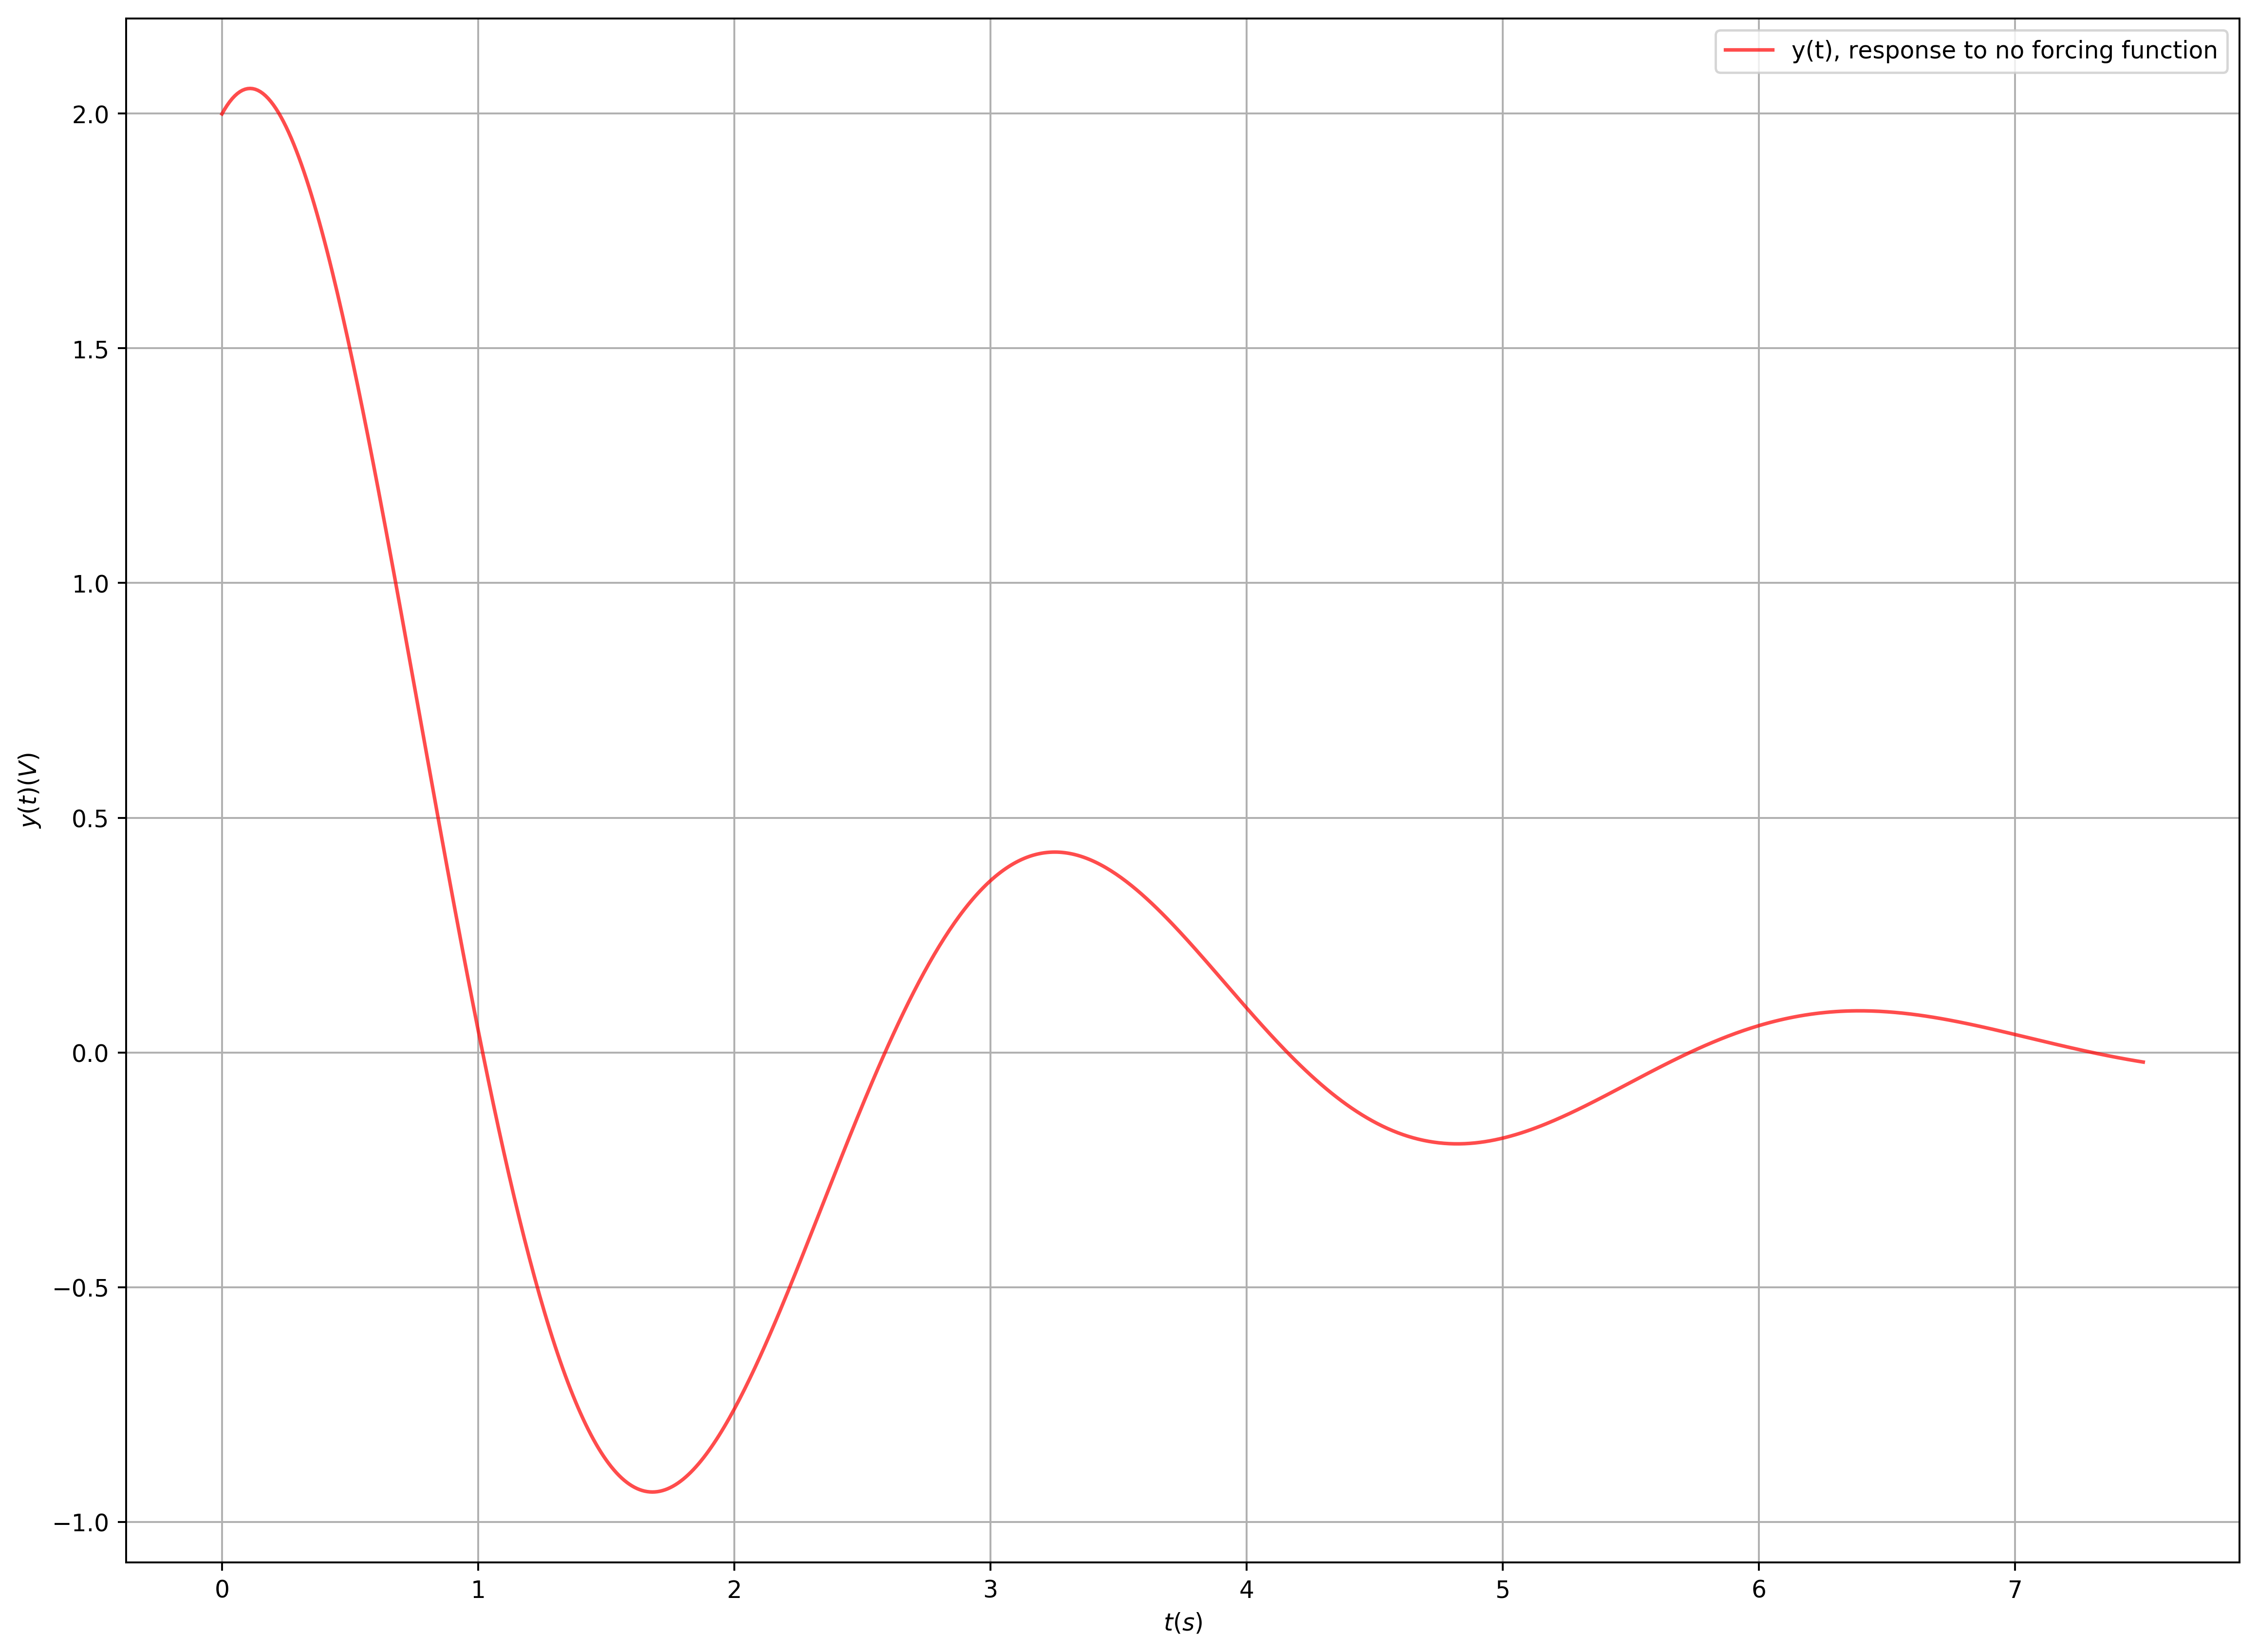

In [3]:
# The analytical solution to the first differential equation
def y_func(t):
    return 2.236 * np.exp(-0.5 * t) * np.sin(2 * t + np.radians(63.4))

t = np.arange(0, t_end + step_size, step_size)
y = y_func(t)
create_plot([t], [(y, )], ["$t (s)$"], ["$y(t) (V)$"],
            [("y(t), response to no forcing function", )], ["Norm"], 1)

## Problem #1, Part 5

In [4]:
# The discrete delta function
def discrete_delta(k):
    return 1 if k == 0 else 0 

# The discretization of the function for y[n]
def discrete_y(y_t, T, n_range=[0, 10]):
    x_vals = np.arange(n_range[0], n_range[1] + 1, 1)
    y_vals = []
    for n in x_vals: 
        num = -y_t((n-1) * T) - y_t((n+1) * T) - T * y_t((n+1) * T)
        den = 4.25 * T * T - T - 2
        y_vals.append(num / den)
        
    return x_vals, y_vals

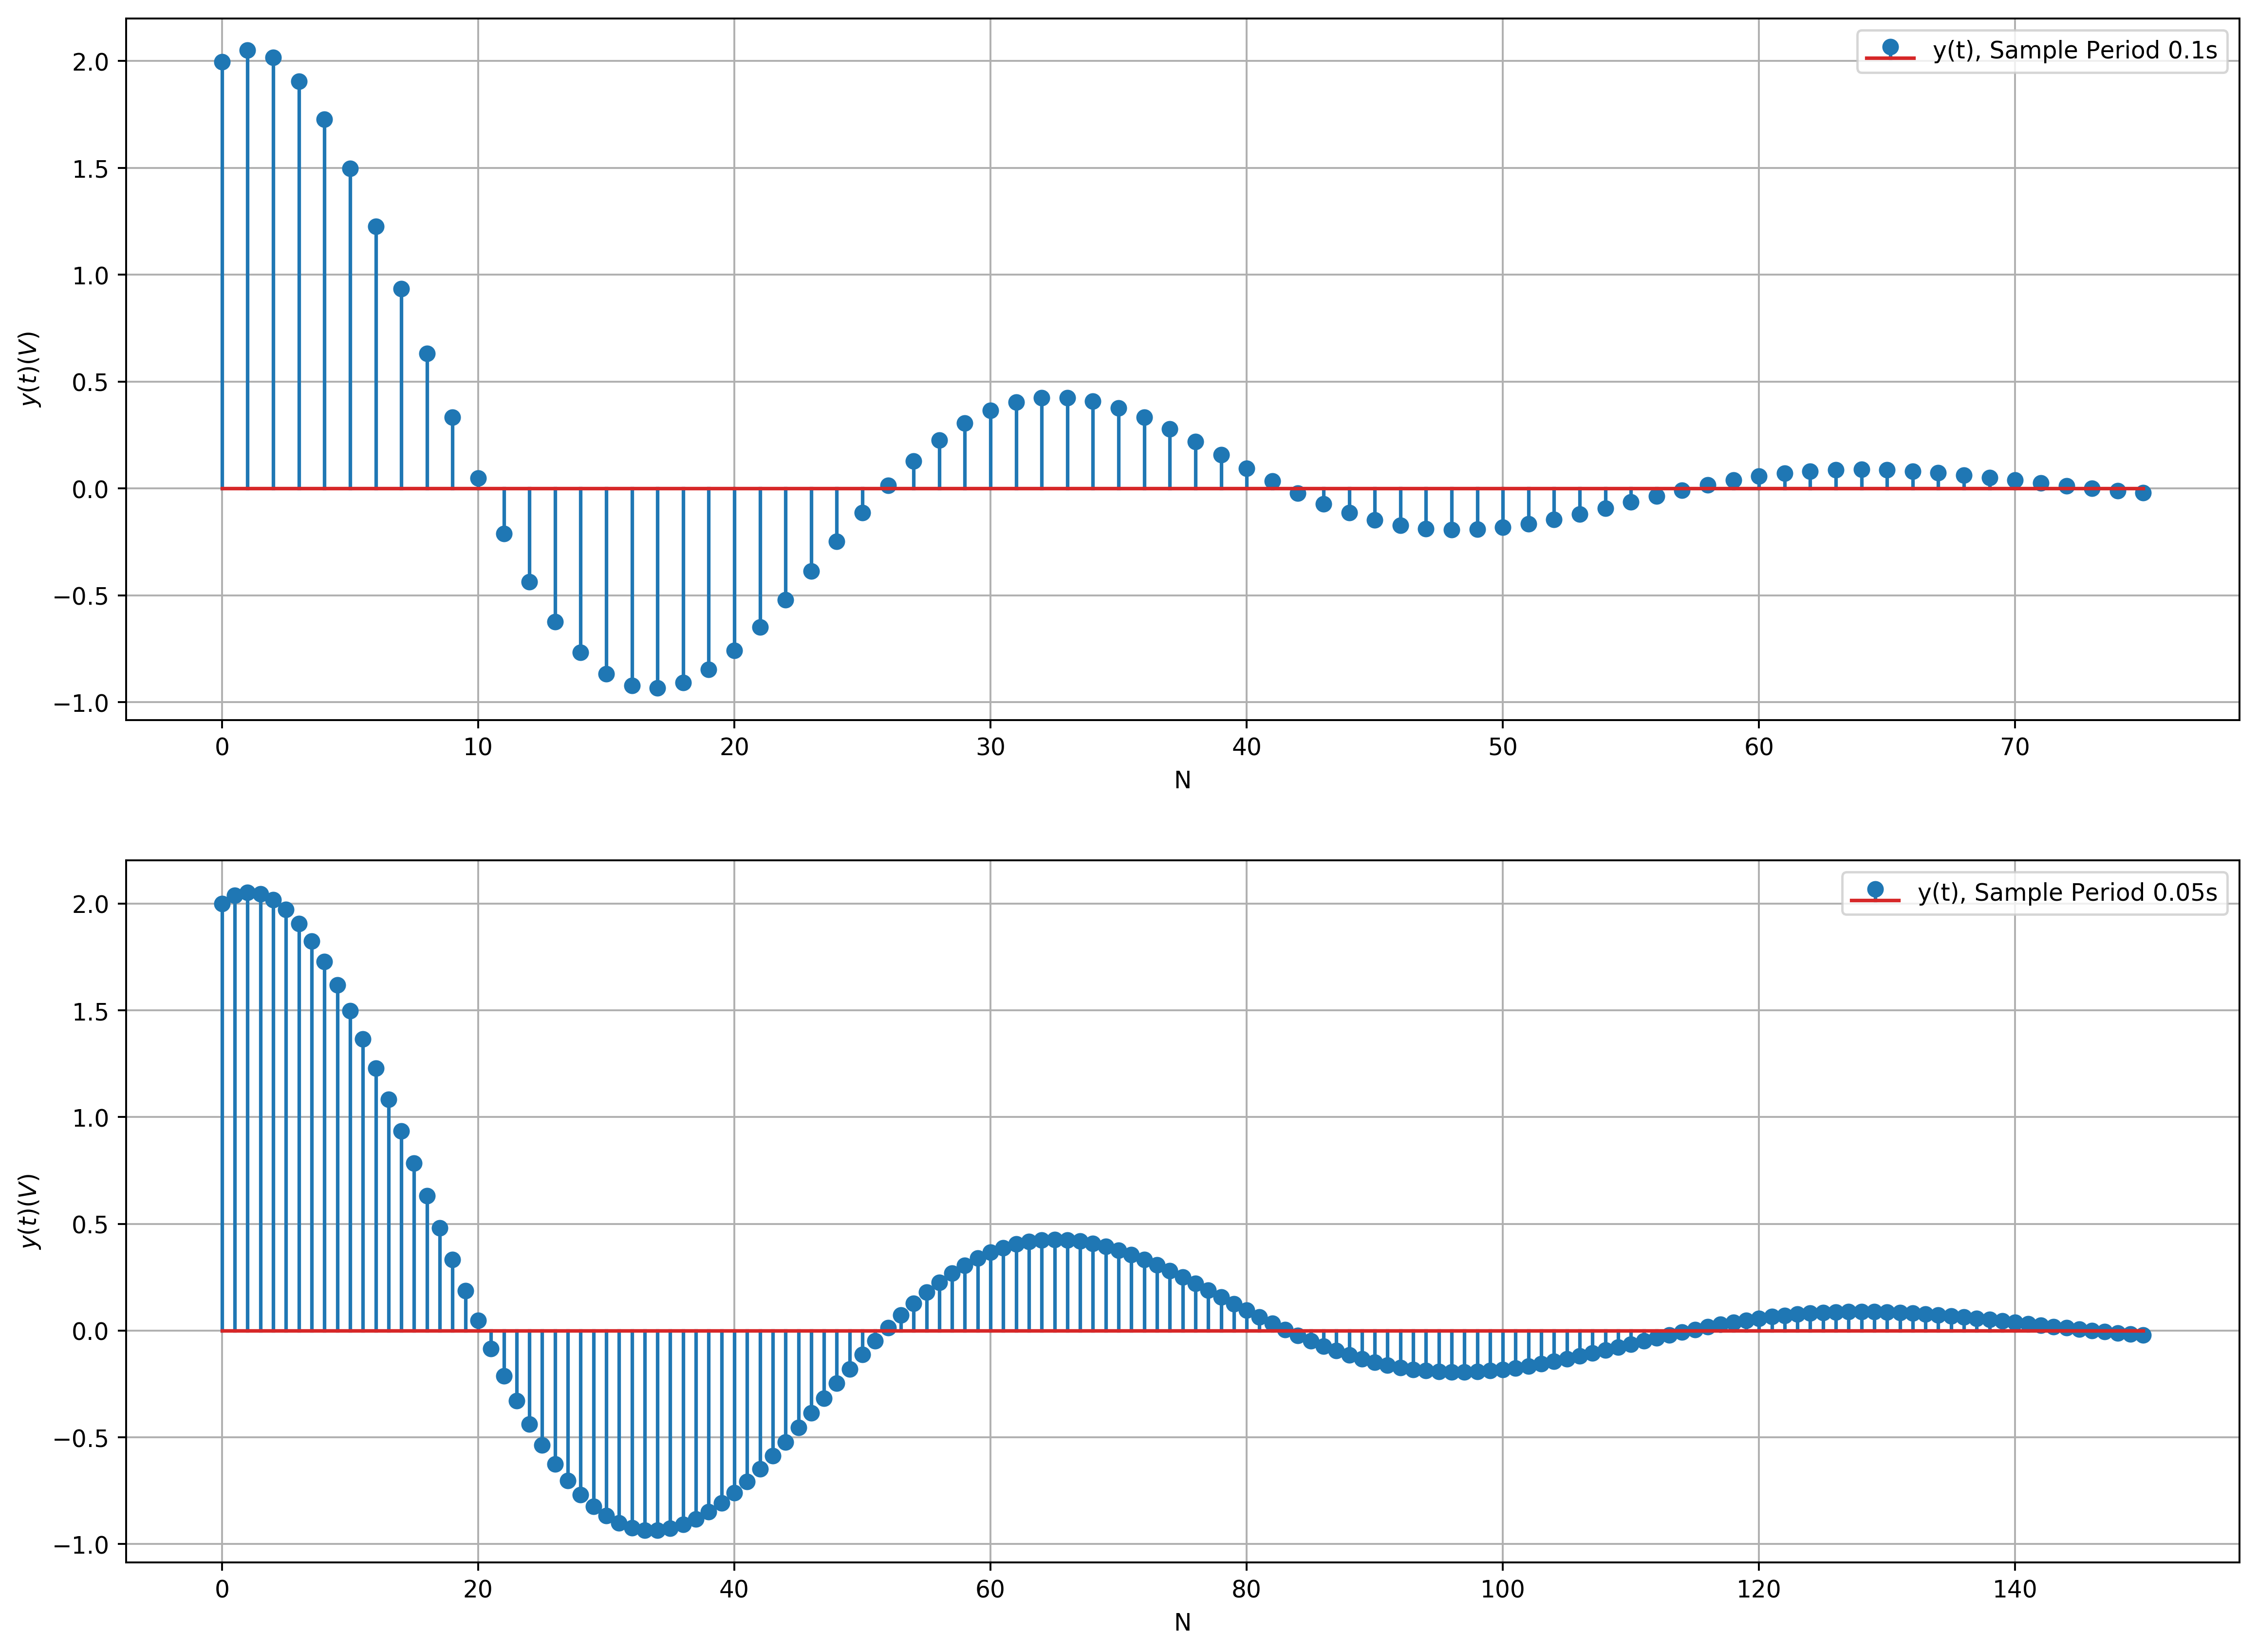

In [5]:
# Generate the discrete plots of the functions
x_01, y_01 = discrete_y(y_func, 0.1, [0, t_end / 0.1])
x_005, y_005 = discrete_y(y_func, 0.05, [0, t_end / 0.05])
create_plot([x_01, x_005], [(y_01, ), (y_005, )], ["N", "N"], ["$y(t) (V)$", "$y(t) (V)$"],
            [("y(t), Sample Period 0.1s", ), ("y(t), Sample Period 0.05s", )],
            mode_list=["stem", "stem"], num_rows=2)

## Problem #1, Part 6

The result of plotting the difference equation clearly matches in both shape and amplitudes. Plotted over the same time frame, but using different sampling periods, the effective 'resolution' on the second plot clearly increases as the period decreases. This is a very logical effect, as we expect a function that is sampled more often to be more closely represented by those samples.

## Problem #2, Part 3

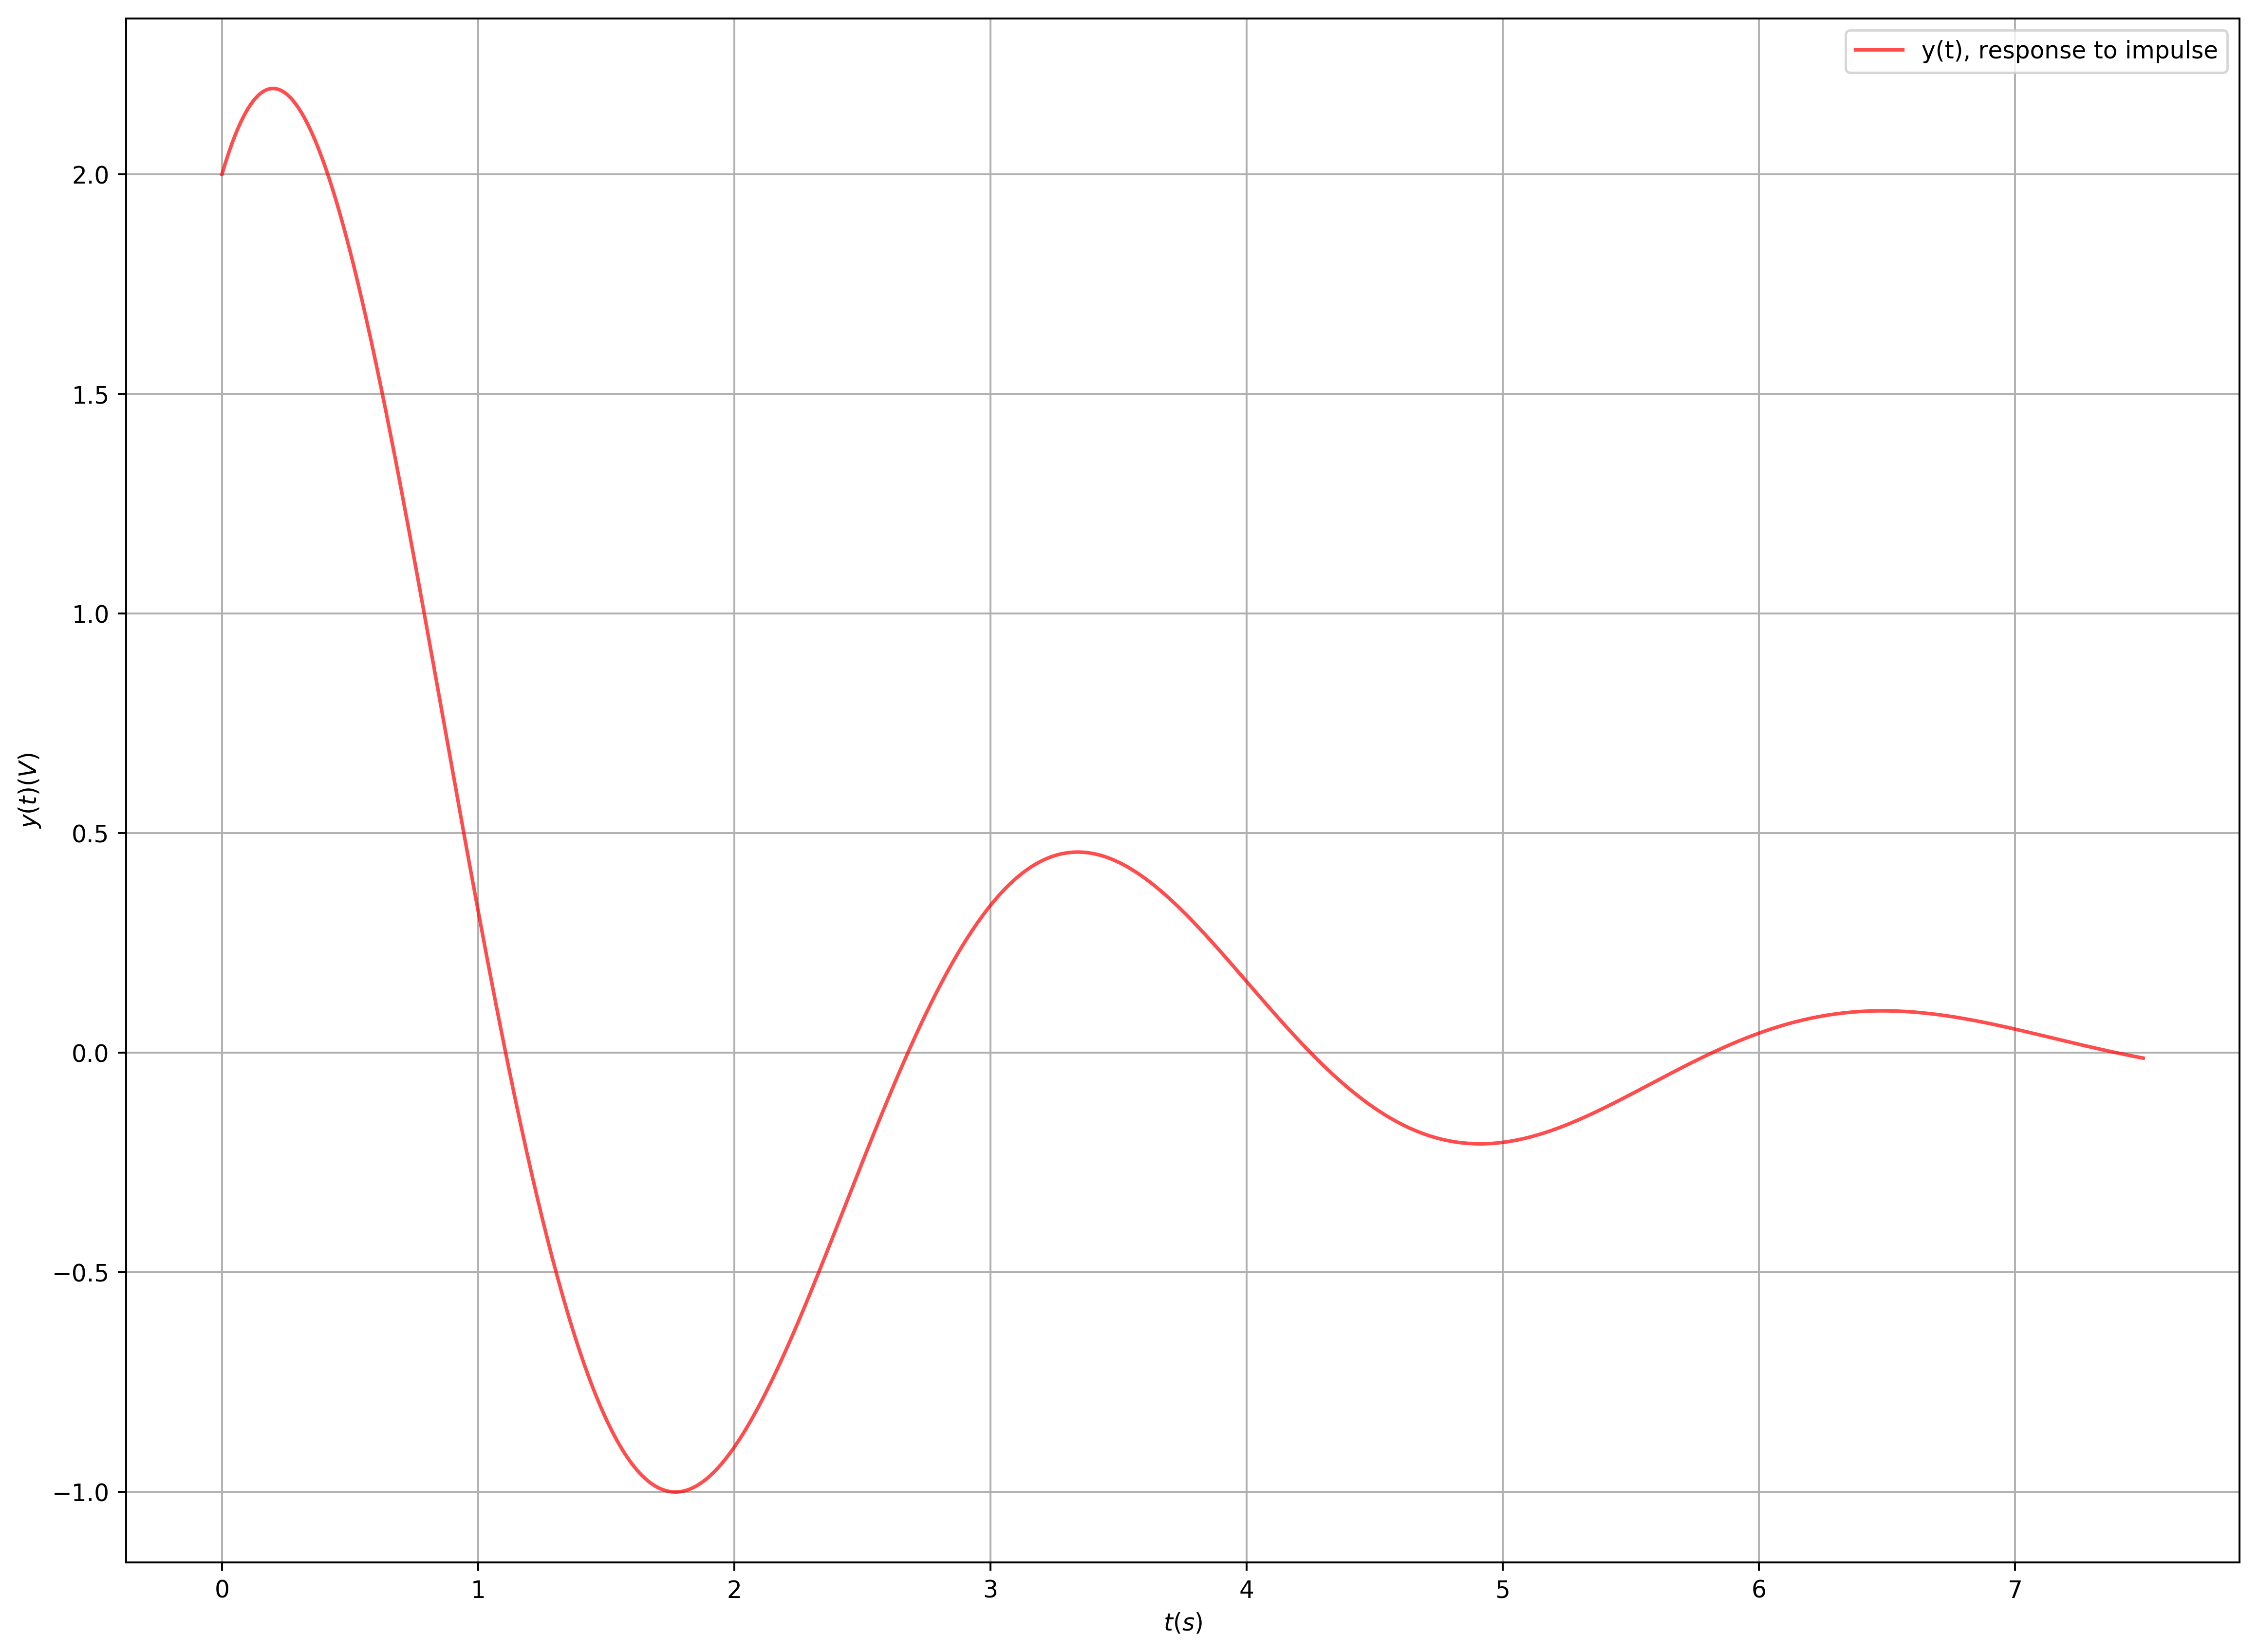

In [6]:
# The analytical solution to the second differential equation
def y_func_2(t):
    return 2.5 * np.exp(-0.5 * t) * np.sin(2 * t + np.radians(53.13))

y_2 = y_func_2(t)
create_plot([t], [(y_2, )], ["$t (s)$"], ["$y(t) (V)$"],
            [("y(t), response to impulse", )], ["Norm"], 1)

## Problem #2, Part 5

In [7]:
# The discretization of the function for y[n]
def discrete_y_2(y_t, T, n_range=[0, 10]):
    x_vals = np.arange(n_range[0], n_range[1] + 1, 1)
    y_vals = []
    for n in x_vals: 
        num = T * T * discrete_delta(n * T) - y_t((n-1) * T) - y_t((n+1) * T) - T * y_t((n+1) * T)
        den = 4.25 * T * T - T - 2
        y_vals.append(num / den)
        
    return x_vals, y_vals

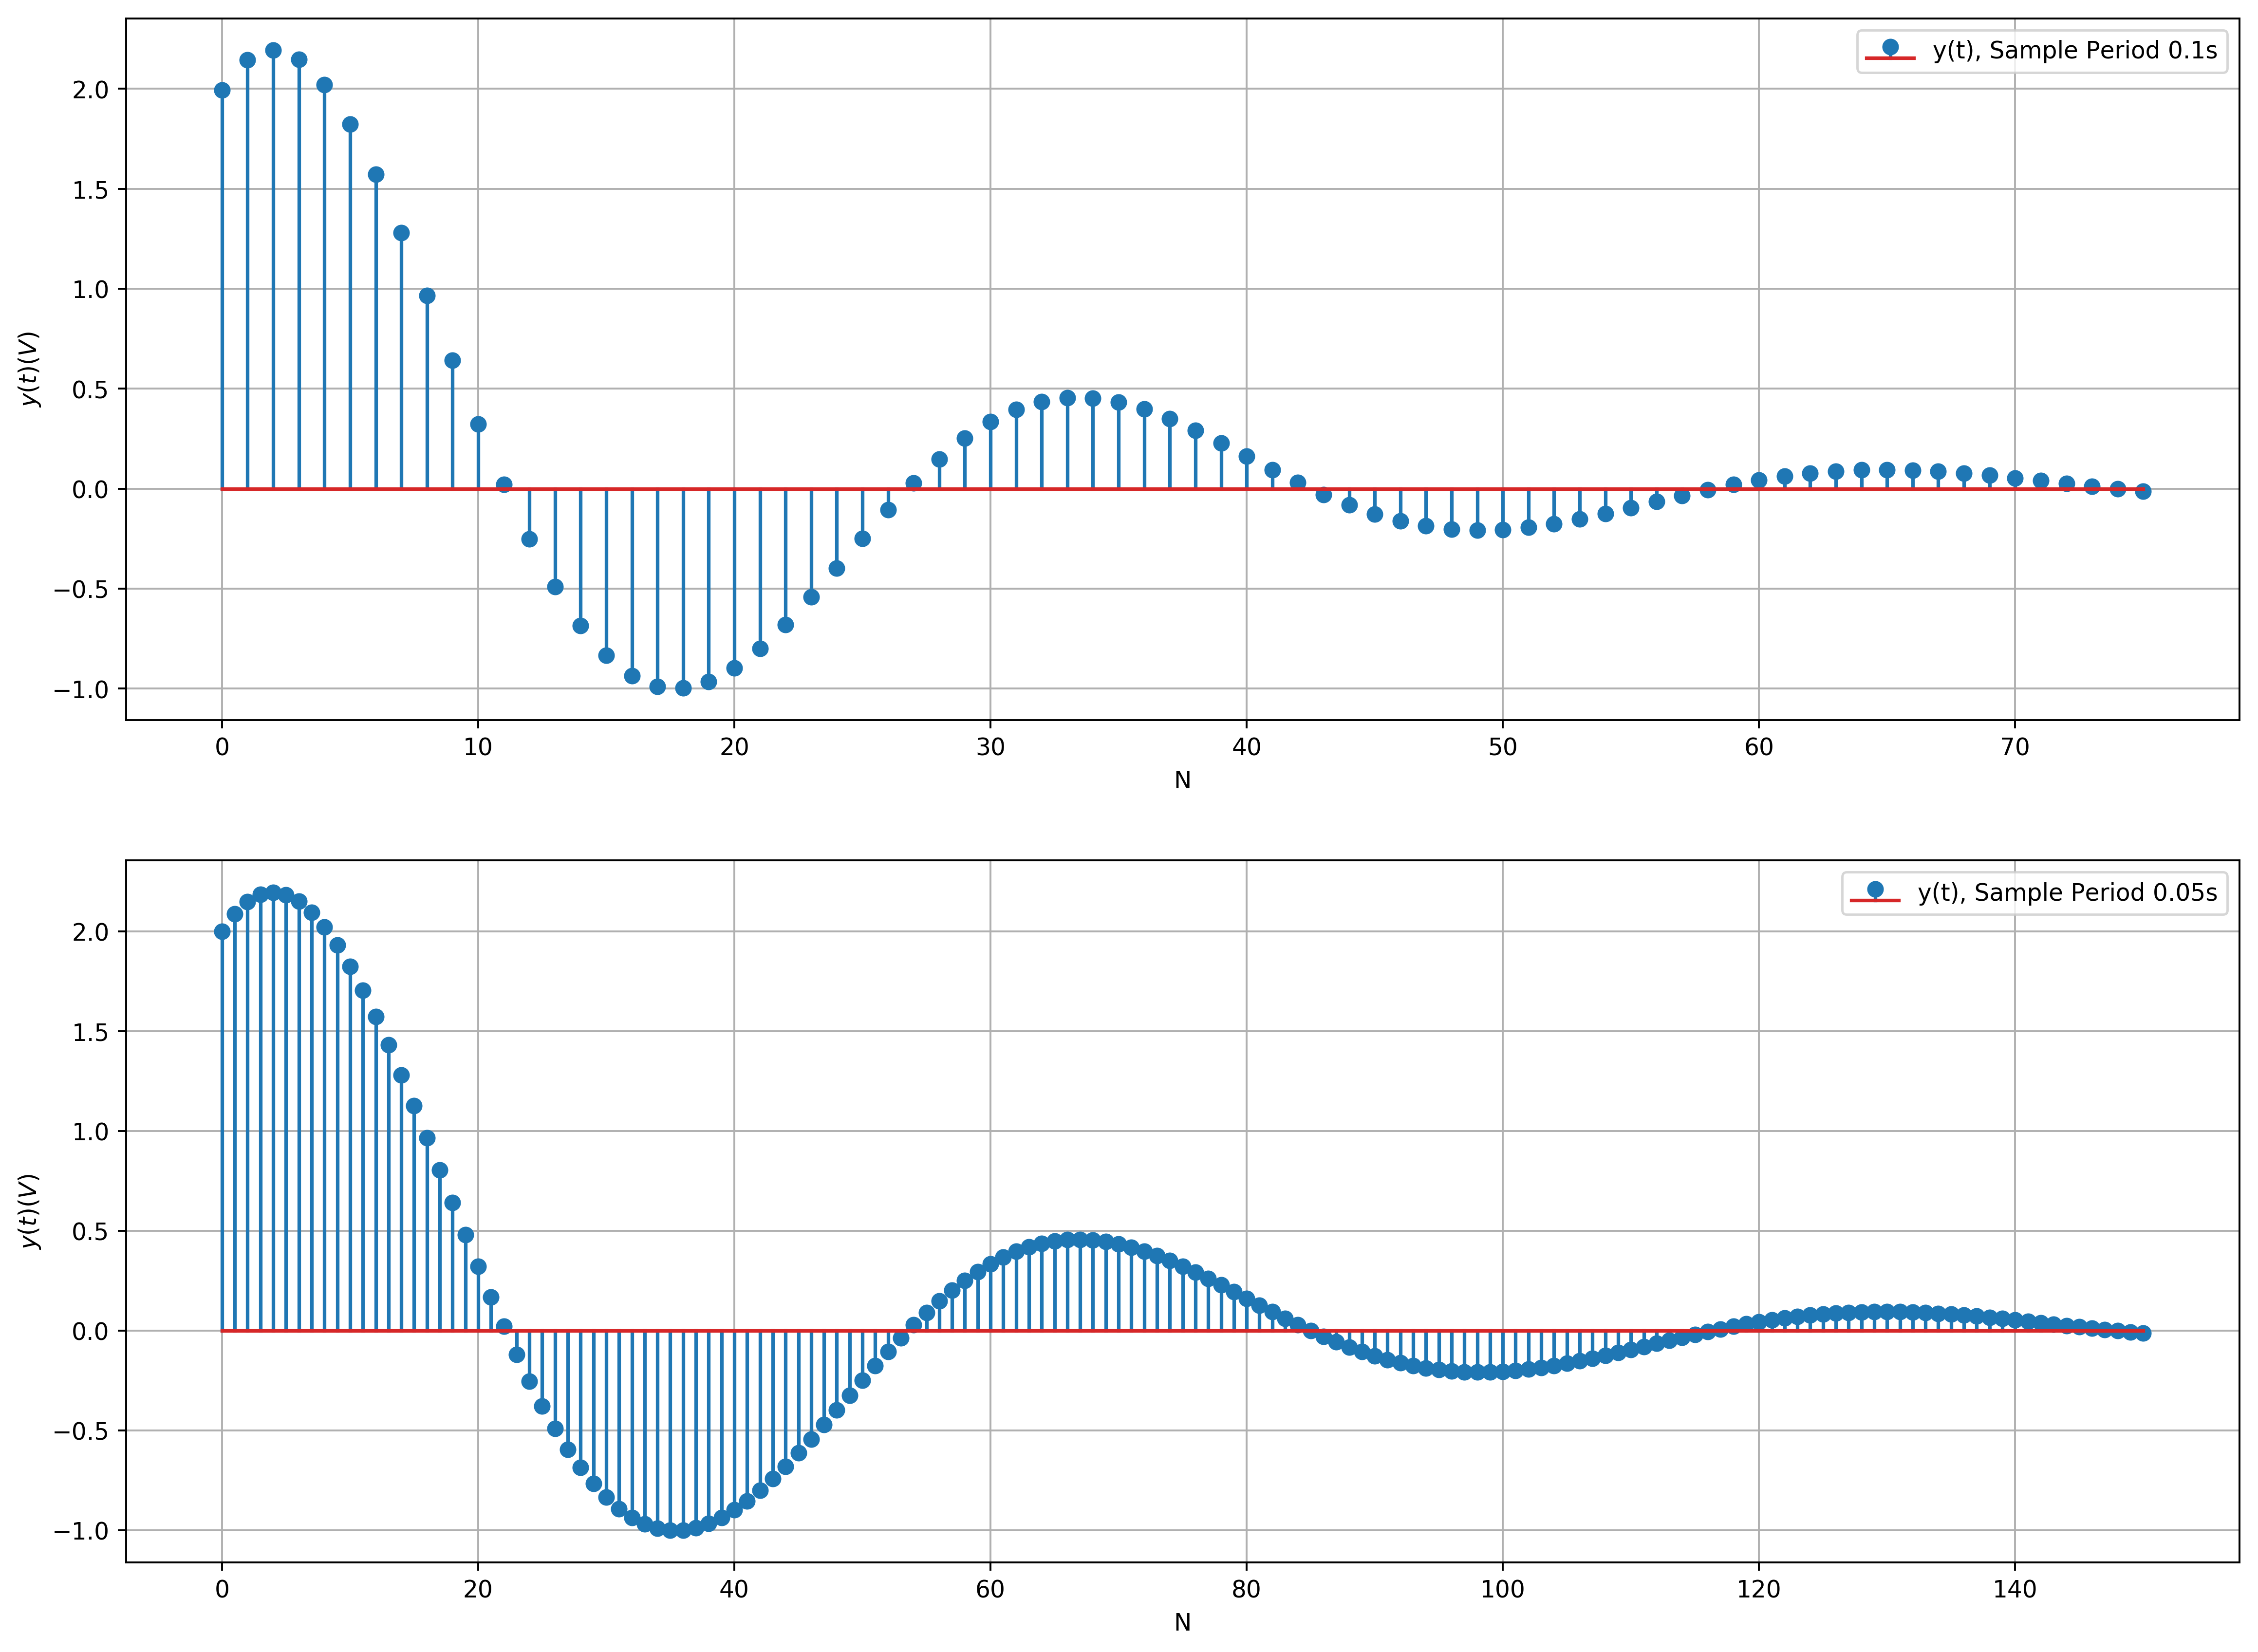

In [8]:
# Generate the discrete plots for the second differential equation
x_01_2, y_01_2 = discrete_y_2(y_func_2, 0.1, [0, t_end / 0.1])
x_005_2, y_005_2 = discrete_y_2(y_func_2, 0.05, [0, t_end / 0.05])
create_plot([x_01_2, x_005_2], [(y_01_2, ), (y_005_2, )],
            ["N", "N"], ["$y(t) (V)$", "$y(t) (V)$"],
            [("y(t), Sample Period 0.1s", ), ("y(t), Sample Period 0.05s", )],
            mode_list=["stem", "stem"], num_rows=2)

## Problem #3, Part 3

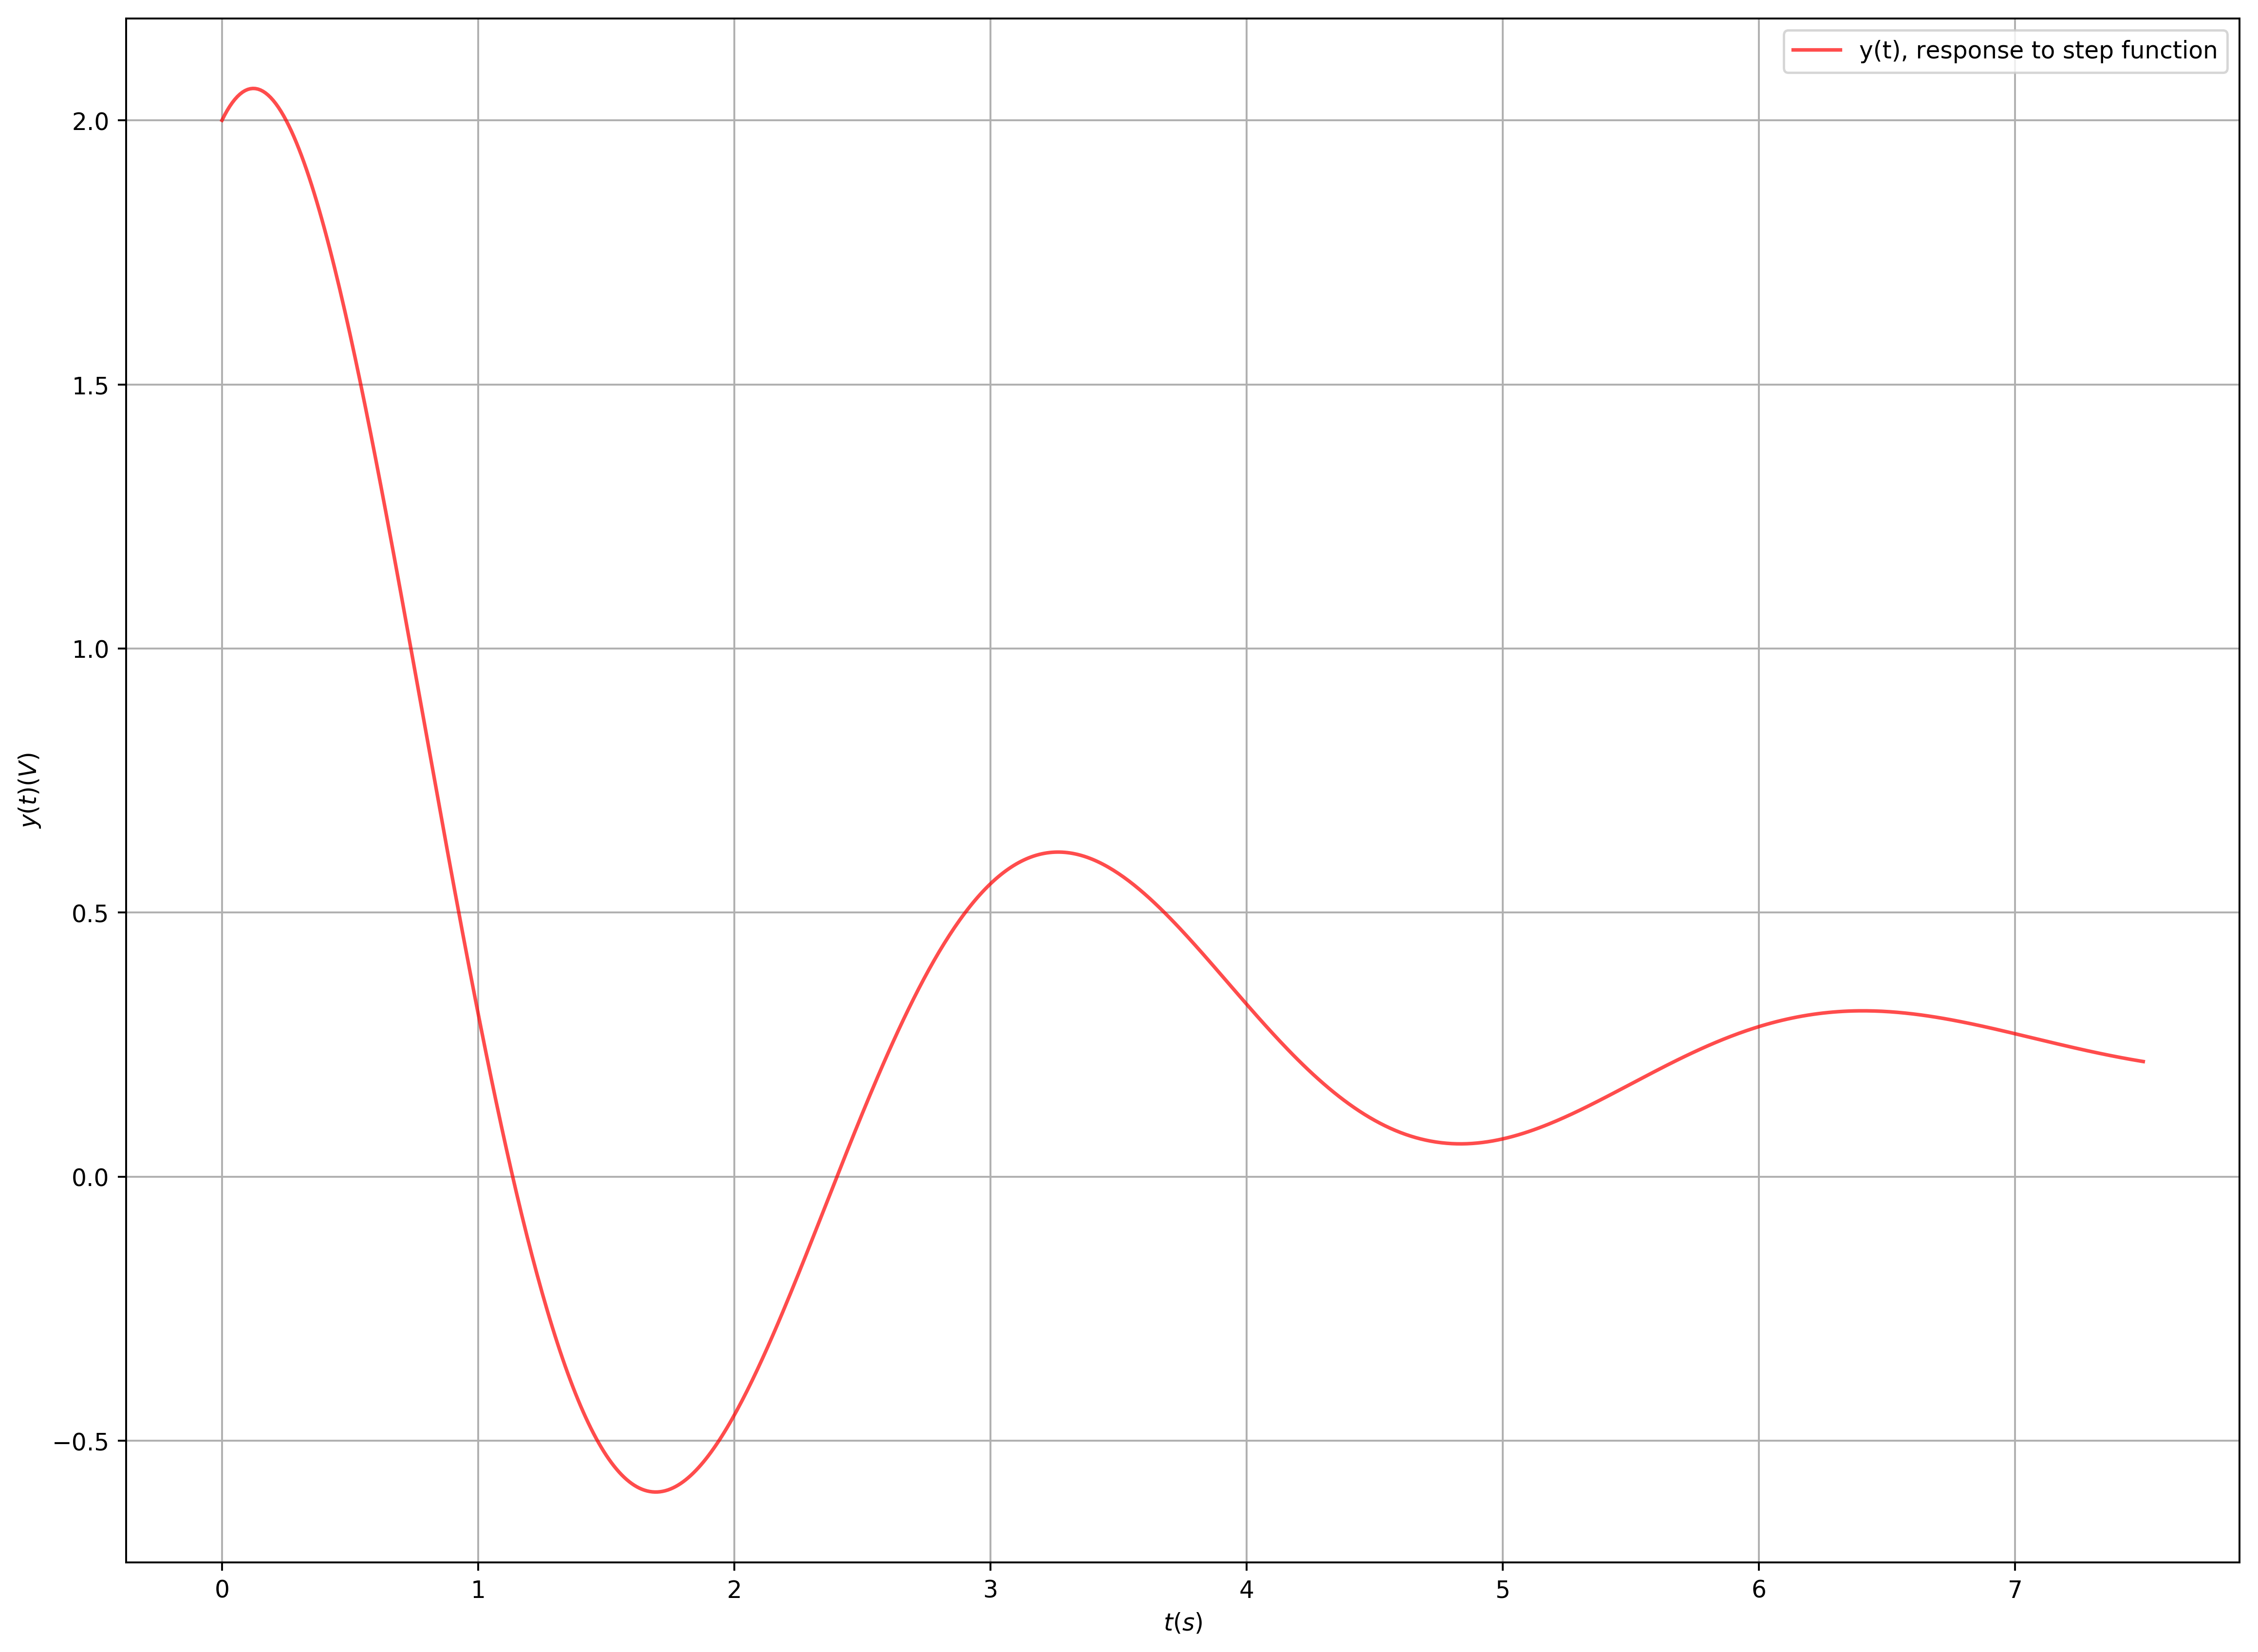

In [9]:
# The analytical solution to the third differential equation
def y_func_3(t):
    return 0.2353 + 2 * np.exp(-0.5 * t) * np.sin(2 * t + np.radians(61.928))

y_3 = y_func_3(t)
create_plot([t], [(y_3, )], ["$t (s)$"], ["$y(t) (V)$"],
            [("y(t), response to step function", )], ["Norm"], 1)

## Problem #3, Part 5

In [10]:
# The discretization of the function for y[n]
def discrete_y_3(y_t, T, n_range=[0, 10]):
    x_vals = np.arange(n_range[0], n_range[1] + 1, 1)
    y_vals = []
    for n in x_vals: 
        num = T * T * 1 - y_t((n-1) * T) - y_t((n+1) * T) - T * y_t((n+1) * T)
        den = 4.25 * T * T - T - 2
        y_vals.append(num / den)
        
    return x_vals, y_vals

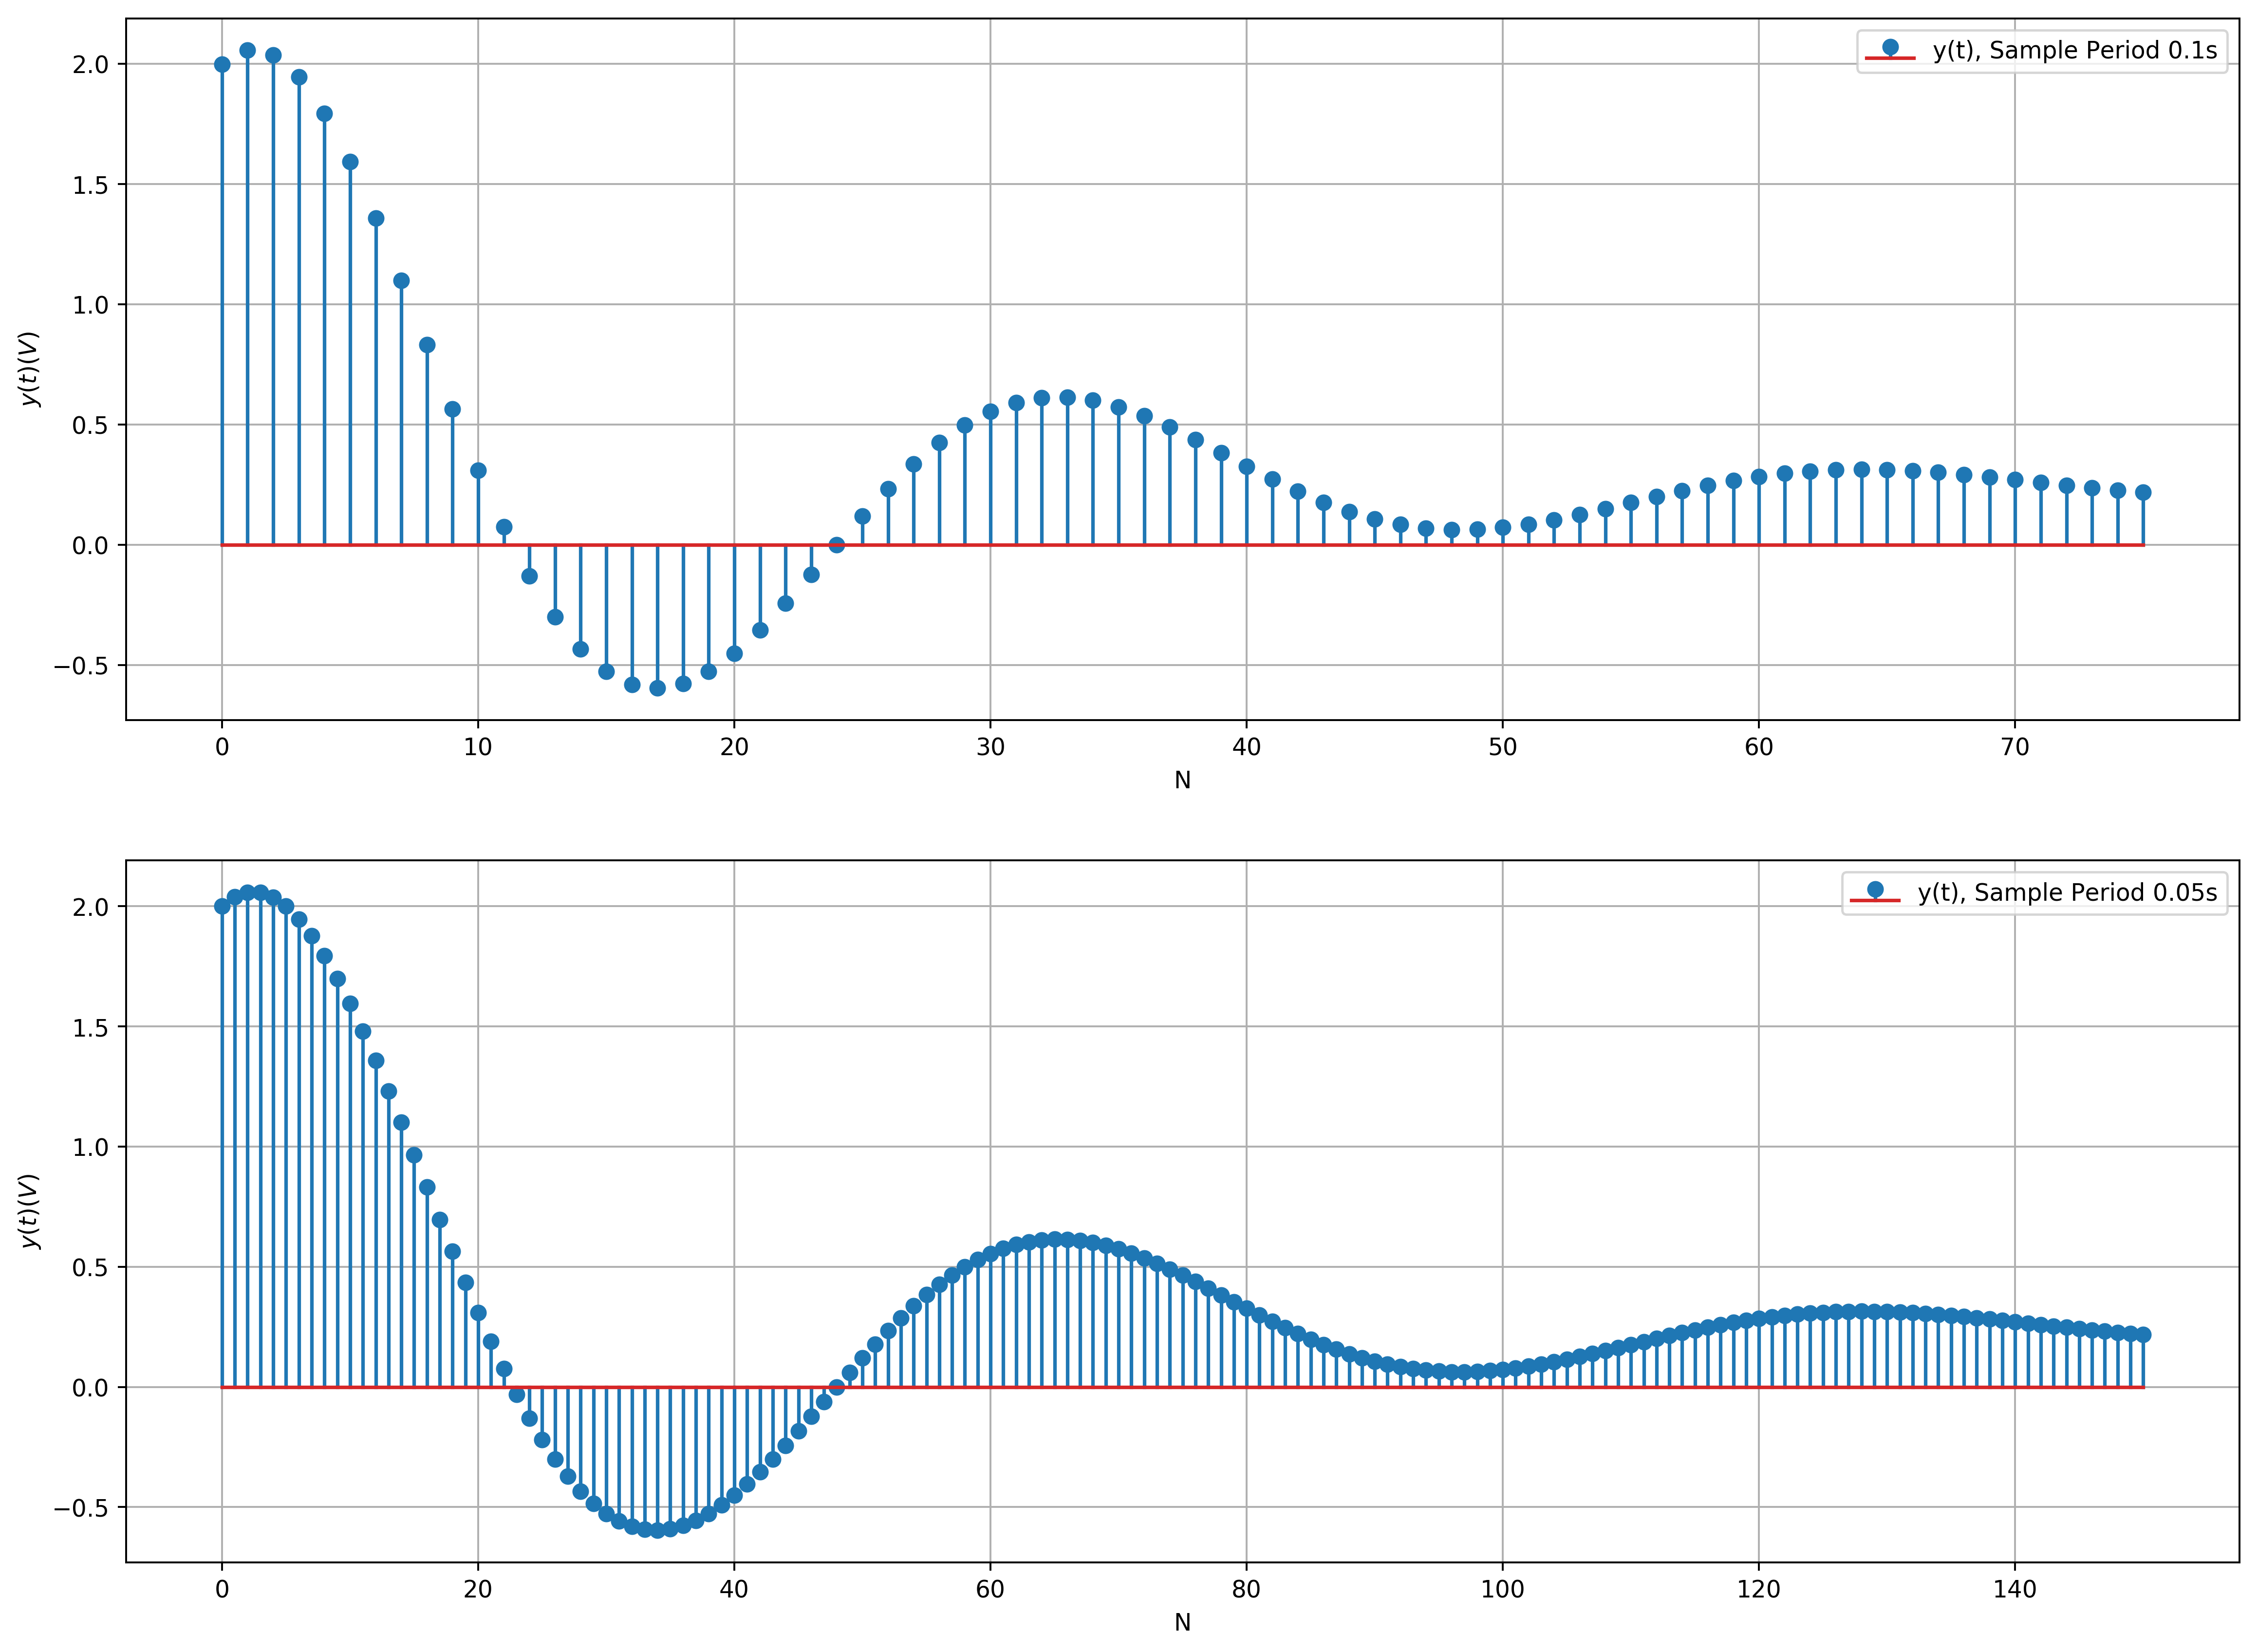

In [11]:
# Generate the discrete plots for the third differential equation
x_01_3, y_01_3 = discrete_y_3(y_func_3, 0.1, [0, t_end / 0.1])
x_005_3, y_005_3 = discrete_y_3(y_func_3, 0.05, [0, t_end / 0.05])
create_plot([x_01_3, x_005_3], [(y_01_3, ), (y_005_3, )],
            ["N", "N"], ["$y(t) (V)$", "$y(t) (V)$"],
            [("y(t), Sample Period 0.1s", ), ("y(t), Sample Period 0.05s", )],
            mode_list=["stem", "stem"], num_rows=2)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


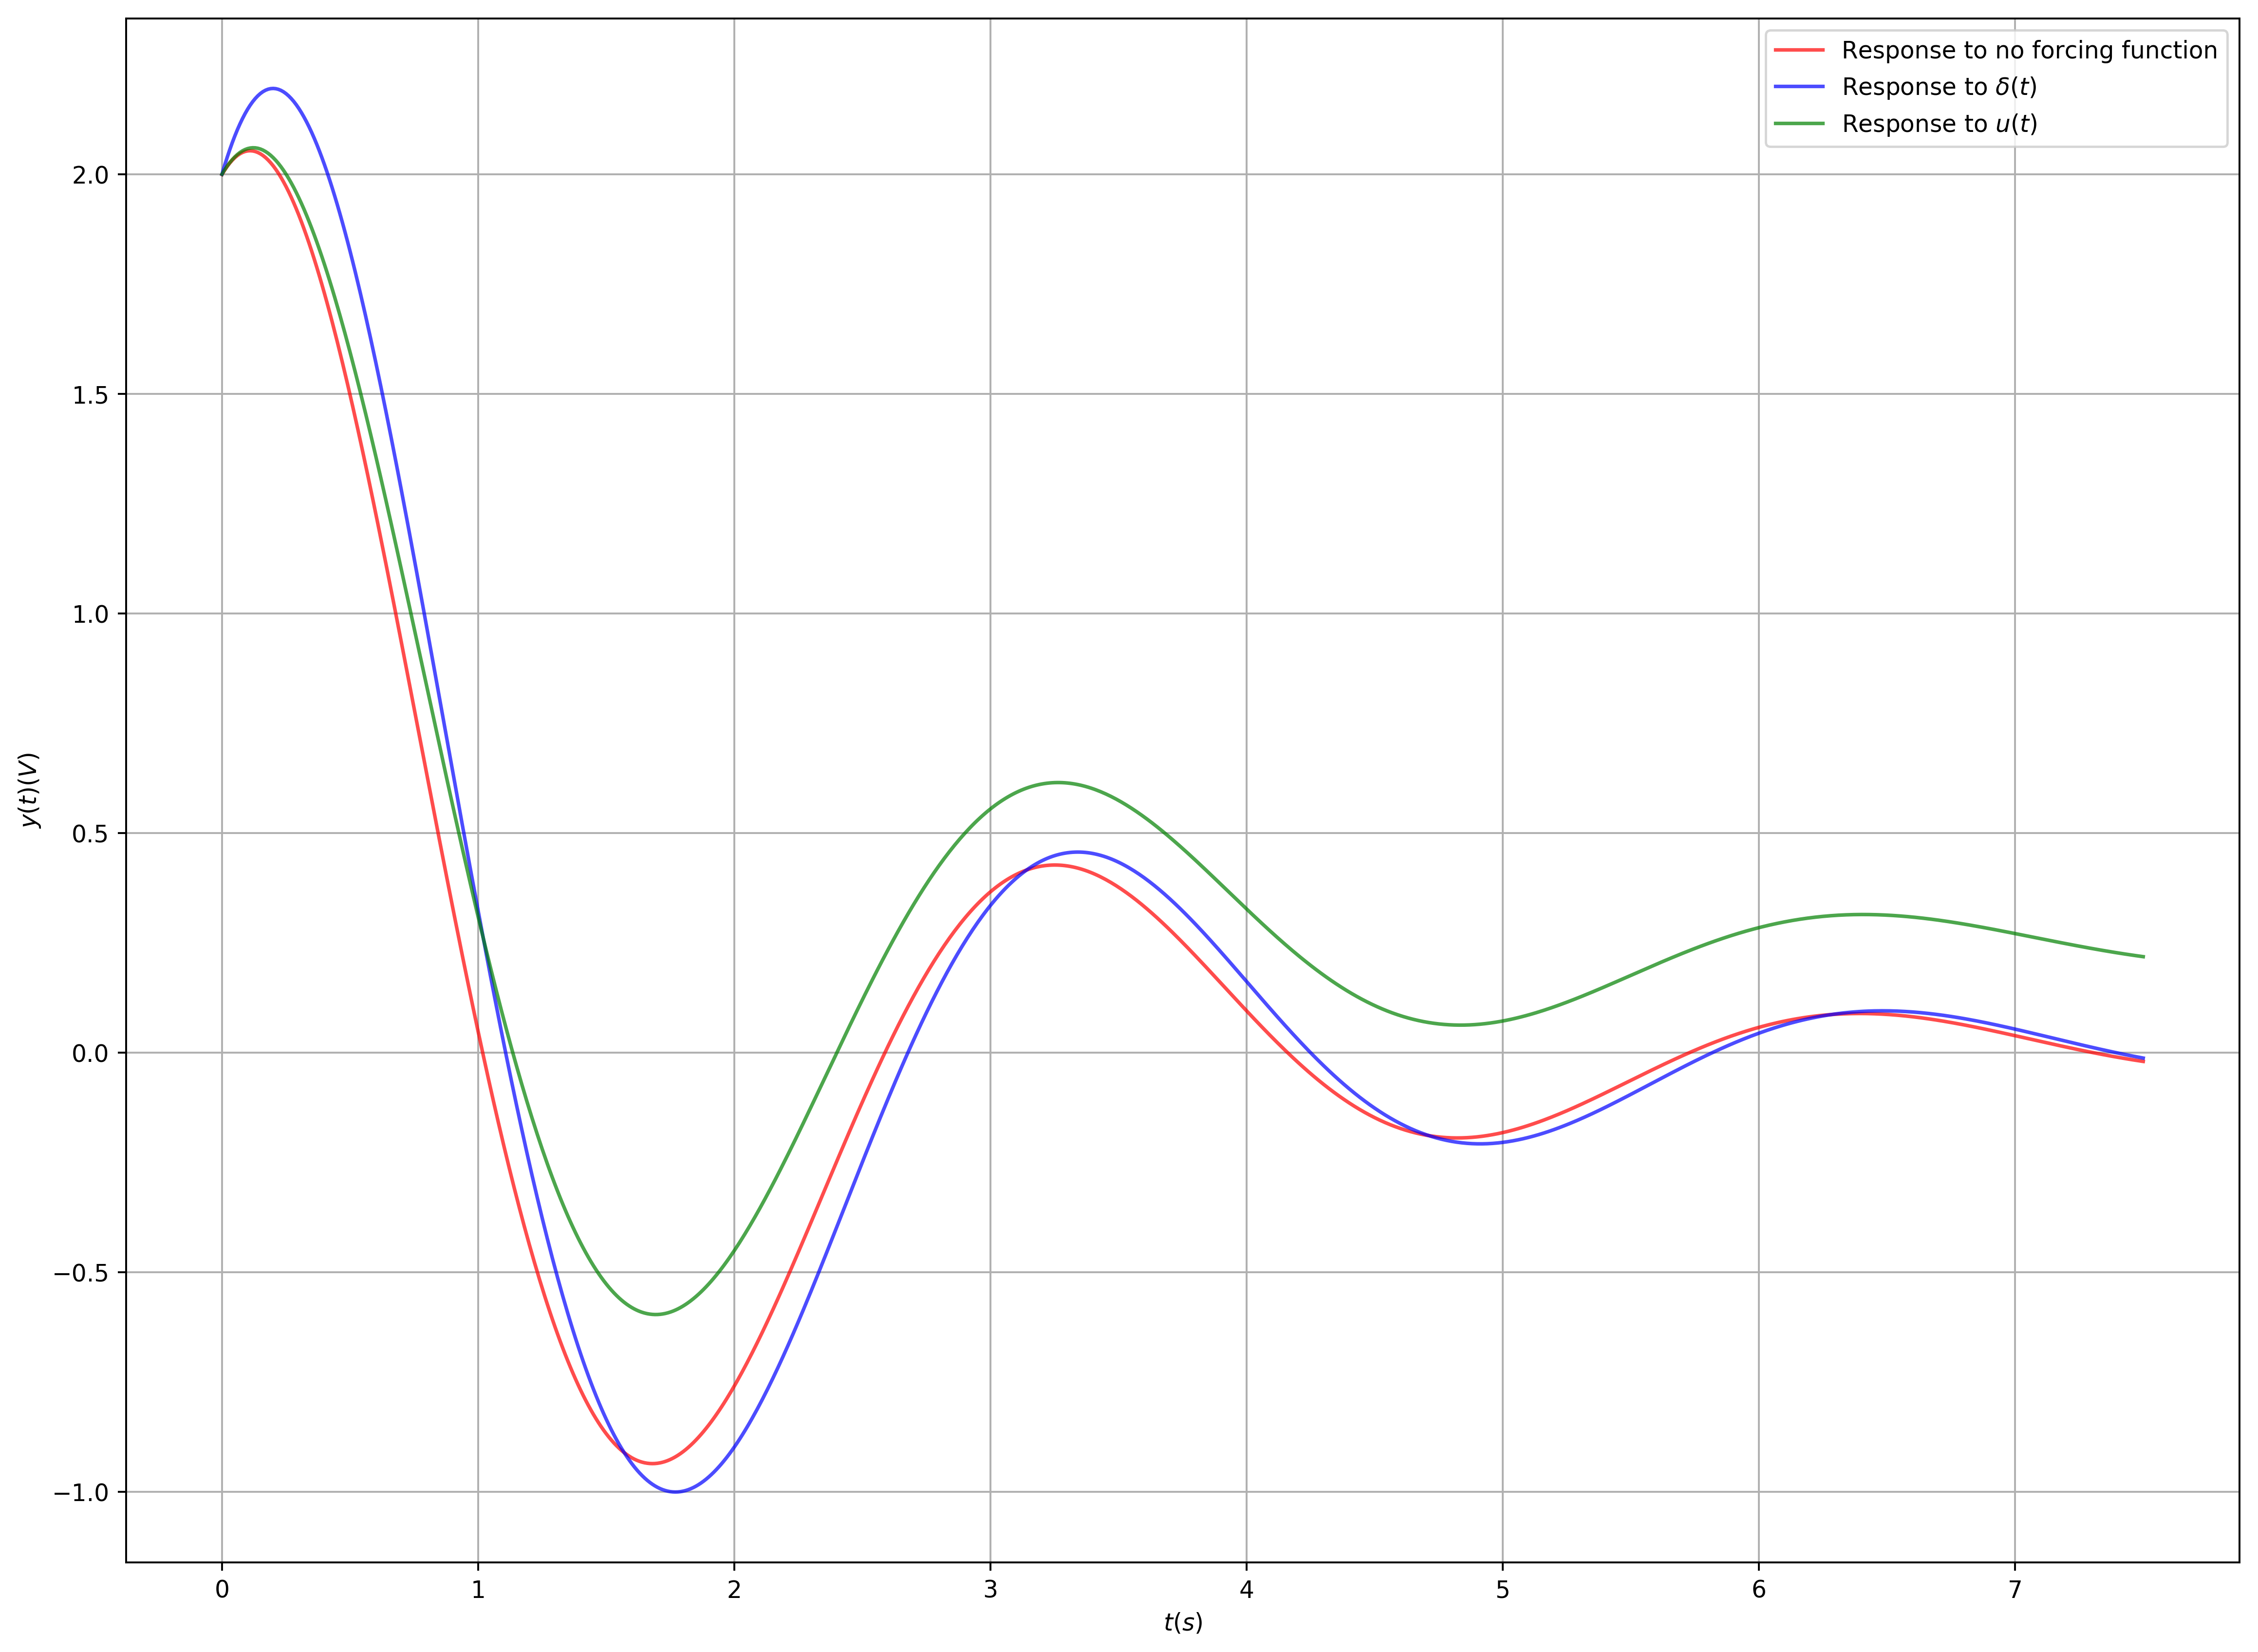

In [12]:
# Compare the three analytical solution for the three initial conditions
create_plot([t], [(y, y_2, y_3)], ["$t (s)$"], ["$y(t) (V)$"],
            [("Response to no forcing function",
              "Response to $\delta (t)$",
              "Response to $u(t)$")], ["Norm"], 1)